In [1]:
%matplotlib inline

from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'
rcParams['font.monospace'] = ['Bitstream Vera Sans Mono']

import numpy as np
import pandas as pd

In [2]:
# using file with 10 "foreground" images and 10 "background" images for visualization / exploration
data = np.loadtxt("../data/input/10true10false.txt", dtype=int, delimiter=",")
data

array([[ 0,  0,  6, ...,  3,  0,  1],
       [ 0,  0, 10, ..., 36, 25,  1],
       [ 0,  1,  0, ...,  2, 10,  1],
       ...,
       [ 0, 23,  5, ...,  0,  0,  0],
       [ 0,  8,  0, ...,  1, 18,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

[0, 3600, 0, 255]

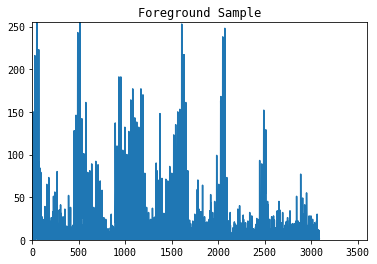

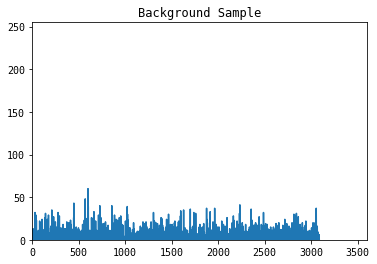

In [228]:
plt.figure()
plt.title("Foreground Sample")
plt.plot(data[0])
plt.axis([0,3600,0,255])

plt.figure()
plt.title("Background Sample")
plt.plot(data[10])
plt.axis([0,3600,0,255])

In [5]:
def getTheIndex(x,y,z):
    return z * 21 * 21 + y * 21 + x
index = getTheIndex(10,10,3)
print (data[0][:-1][index]

SyntaxError: unexpected EOF while parsing (<ipython-input-5-c923b2da2172>, line 4)

In [69]:
[x for x in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### visualizing the data

In [78]:
d1 = np.empty(shape=(21,21,7))
for i in range(21):
    for j in range(21):
        for k in range(7):
            d1[i,j,k] = data[0][:-1][getTheIndex(i,j,k)]

Center Pixel value:  0.0
Center Pixel value:  7.0
Center Pixel value:  46.0
Center Pixel value:  135.0
Center Pixel value:  99.0
Center Pixel value:  16.0
Center Pixel value:  18.0


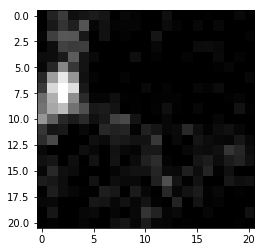

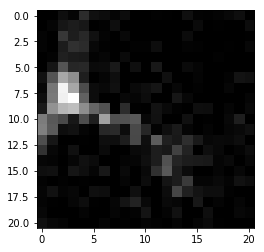

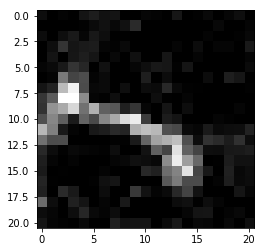

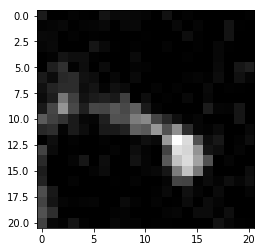

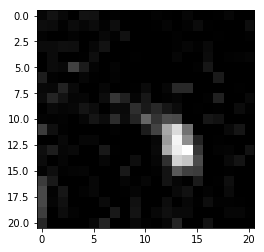

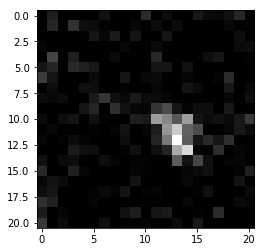

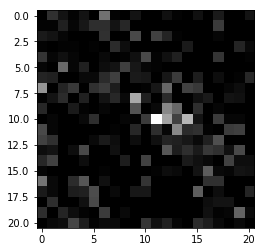

In [79]:
for z_dim in range(7):
    plt.figure()
    print("Center Pixel value: ",d1[10,10,z_dim])
    plt.imshow(d1[:,:,z_dim], cmap='gray', interpolation='nearest')

In [6]:
# Using numpy re-shape
input_data=np.array([(l[:-1]).reshape(21,21,7, order='F') for l in data])
input_labels=np.array([(l[-1]) for l in data])

Center Pixel value:  0
Center Pixel value:  7
Center Pixel value:  46
Center Pixel value:  135
Center Pixel value:  99
Center Pixel value:  16
Center Pixel value:  18


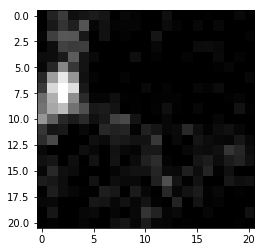

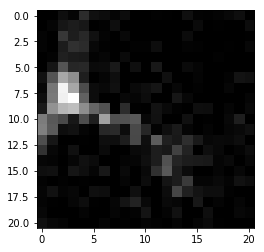

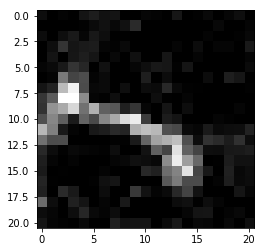

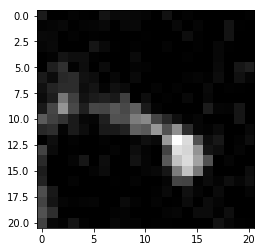

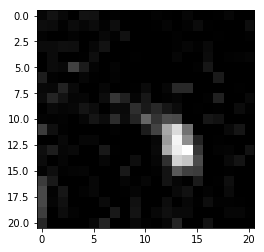

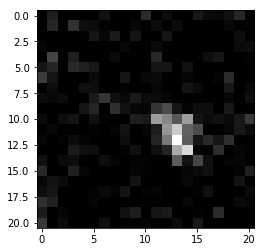

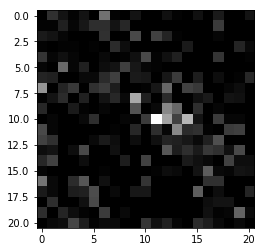

In [84]:
img_index = 0
for z_dim in range(7):
    plt.figure()
    print("Center Pixel value: ",input_data[img_index][10,10,z_dim])
    plt.imshow(input_data[img_index][:,:,z_dim], cmap='gray', interpolation='nearest')

Center Pixel value: 46


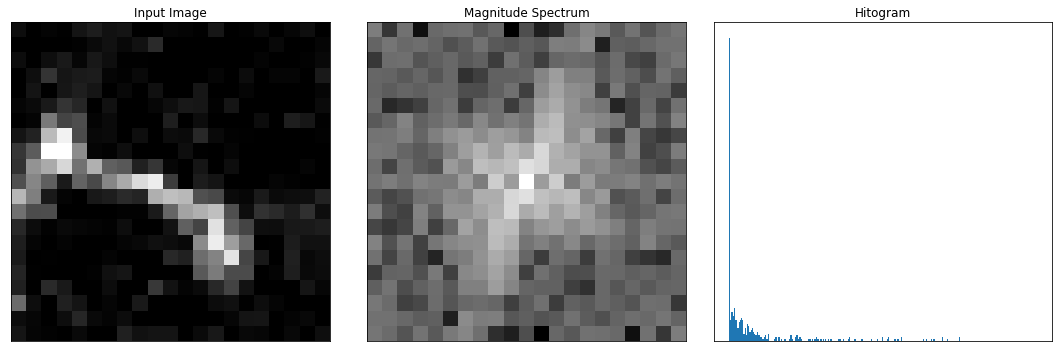

In [103]:
img_index = 0
z_dim=2
img = input_data[img_index][:,:,z_dim]

print('Center Pixel value: %d' % input_data[img_index][10,10,z_dim])

hist,bins = np.histogram(img.ravel(),256,[0,256])
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize=(15,5))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.hist(img.ravel(),256,[0,256])
plt.title('Hitogram'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [30]:
def centerSlice(img,crop_size=3):
    """Take the center slice of a image."""
    """crop_size defaults to 3"""
    y,x = img.shape
    startx = x//2 - crop_size//2
    starty = y//2 - crop_size//2 
    return img[starty:starty+crop_size, startx:startx+crop_size]

centerSlice(img)

array([[  5,  17,   1],
       [ 56,  21, 107],
       [137, 180, 139]])

# Plotting XY slice plane


----------------------------------------------
Image number: 9	 ImageLabel: 1
img-output/sample-000009-xy-1.png

----------------------------------------------
Image number: 10	 ImageLabel: 0
img-output/sample-000010-xy-0.png


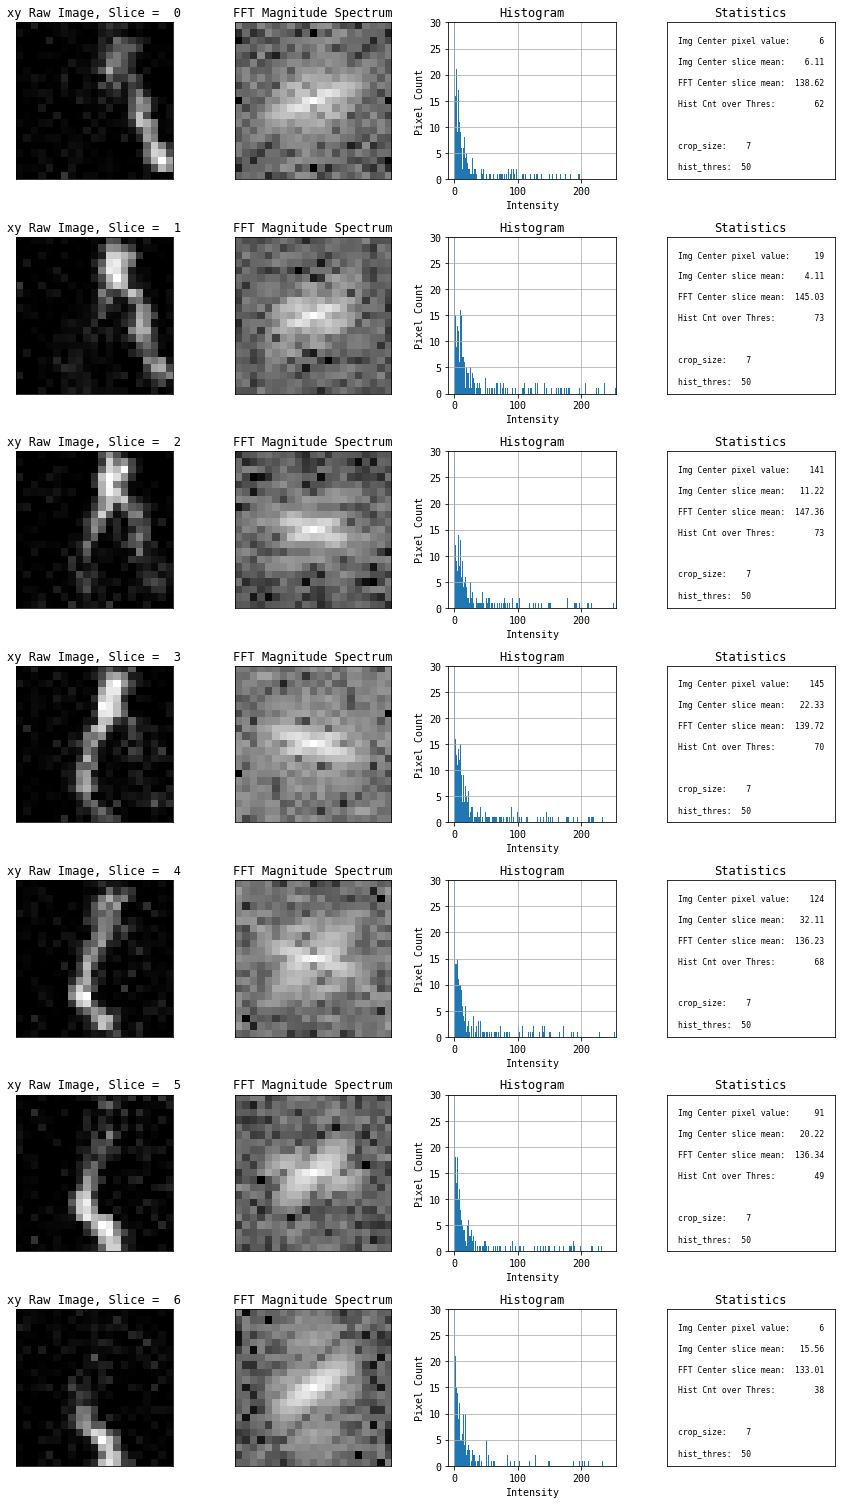

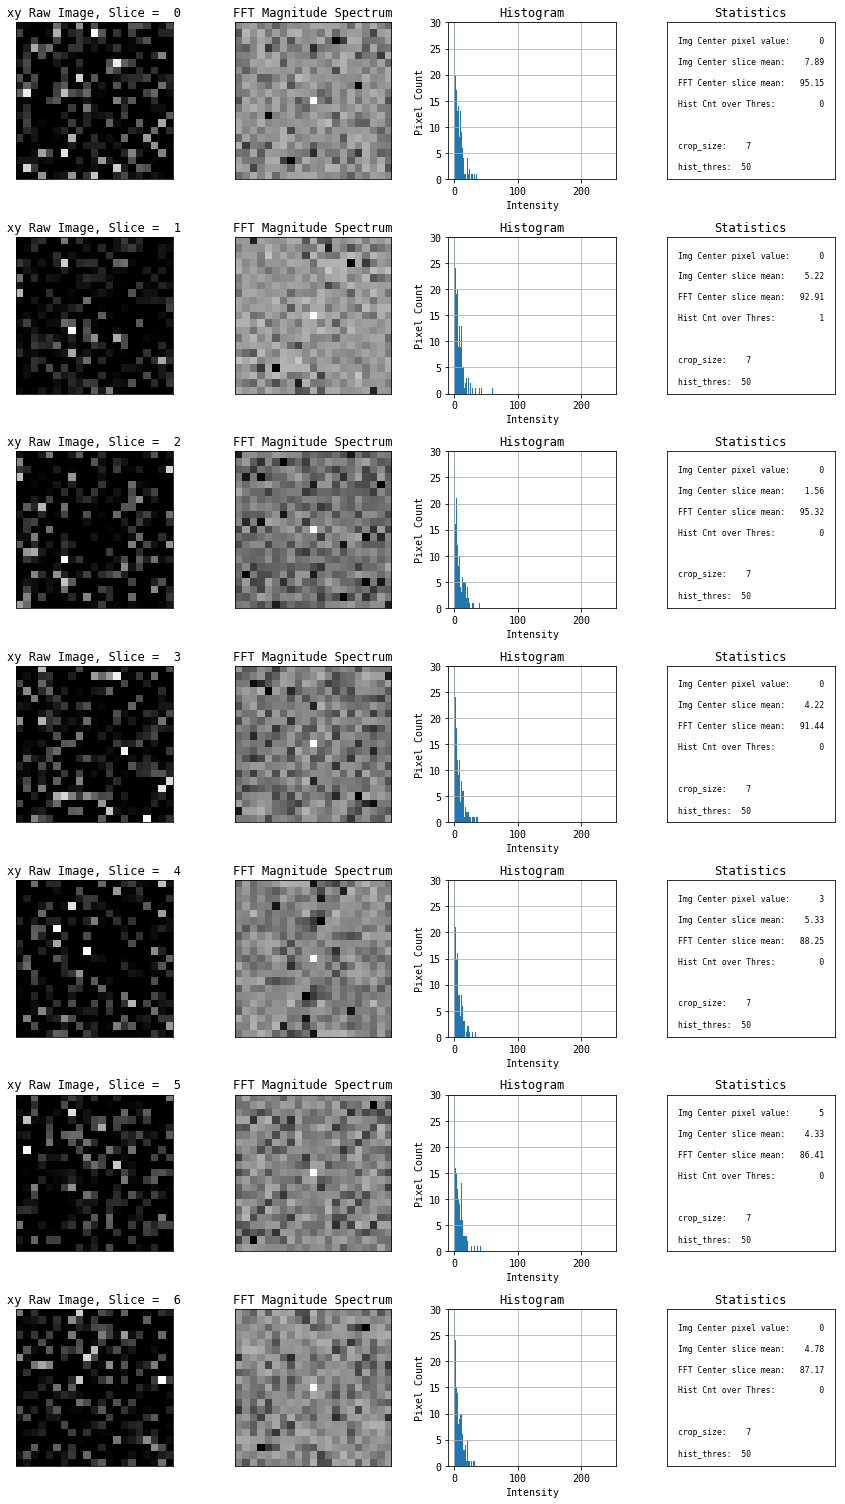

In [229]:
for img_index in [9,10]:

    img_label = input_labels[img_index]
    n_of_slices = 7
    z_range = np.arange(n_of_slices)
    slice_plane='xy'
    fig_y_size=3*n_of_slices
    
    print()
    print("----------------------------------------------")
    print('Image number: %d\t ImageLabel: %d' % (img_index, img_label))
    fig, axes = plt.subplots(nrows=n_of_slices, ncols=4, figsize=(12,fig_y_size))
    for z_dim in z_range:

        # Raw image calc
        img = input_data[img_index][:,:,z_dim]
        
        # Histogram calc
        hist,bins = np.histogram(img.ravel(),256,[0,256])
        
        # FFT calculation
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        
        # Statistics calculation
        crop_size=7
        img_center_sclice_mean = np.mean(centerSlice(img,crop_size))
        img_center_pixel_value = img[10,10]
        fft_center_sclice_mean = np.mean(centerSlice(magnitude_spectrum,crop_size))
        
        hist_thres=50
        hist_count_over_thres = np.sum(hist[hist_thres:])
        
        # --------
        # Plots:

        # Image
        axes[z_dim, 0].set_title('{} Raw Image, Slice = {:2d}'.format(slice_plane, z_dim))
        axes[z_dim, 0].imshow(input_data[img_index][:,:,z_dim], cmap='gray', interpolation='nearest')
        axes[z_dim, 0].axes.get_xaxis().set_ticks([])
        axes[z_dim, 0].axes.get_yaxis().set_ticks([])

        # FFT
        axes[z_dim, 1].set_title('FFT Magnitude Spectrum')
        axes[z_dim, 1].imshow(magnitude_spectrum, cmap = 'gray')
        axes[z_dim, 1].axes.get_xaxis().set_ticks([])
        axes[z_dim, 1].axes.get_yaxis().set_ticks([])

        # Histogram
        axes[z_dim, 2].set_title('Histogram')
        axes[z_dim, 2].hist(img.ravel(),256,[0,256])
        axes[z_dim, 2].axis([-10,255,0,30])
        axes[z_dim, 2].set_xlabel('Intensity')
        axes[z_dim, 2].set_ylabel('Pixel Count')
        axes[z_dim, 2].grid()
        
        # Summary
        fontsize=8
        axes[z_dim, 3].set_title('Statistics')
        axes[z_dim, 3].axes.get_xaxis().set_ticks([])
        axes[z_dim, 3].axes.get_yaxis().set_ticks([])
        axes[z_dim, 3].text(1, 13, r'Img Center pixel value: {:6d}'.format(img_center_pixel_value), fontsize=fontsize)
        axes[z_dim, 3].text(1, 11, r'Img Center slice mean:  {:6.2f}'.format(img_center_sclice_mean), fontsize=fontsize)
        axes[z_dim, 3].text(1, 9,  r'FFT Center slice mean:  {:6.2f}'.format(fft_center_sclice_mean), fontsize=fontsize)
        axes[z_dim, 3].text(1, 7 , r'Hist Cnt over Thres:    {:6d}'.format(hist_count_over_thres), fontsize=fontsize)
        axes[z_dim, 3].text(1, 3 , r'crop_size:  {:3d}'.format(crop_size), fontsize=fontsize)
        axes[z_dim, 3].text(1, 1 , r'hist_thres: {:3d}'.format(hist_thres), fontsize=fontsize)
        axes[z_dim, 3].axis([0, 15, 0, 15])
        
        

    save_fig = True
    fig_format = 'png'
    fig_dpi =300
    
    fig.tight_layout()
    fig_name = 'img-output/sample-{:06d}-{}-{:d}.{}'.format(img_index,slice_plane,img_label,fig_format)
    print(fig_name)
    if(save_fig): fig.savefig(fig_name, bbox_inches='tight', format=fig_format, dpi=fig_dpi)

# Plotting XZ slice plane


----------------------------------------------
Image number: 9	 ImageLabel: 1
img-output/sample-000009-xz-1.png

----------------------------------------------
Image number: 10	 ImageLabel: 0
img-output/sample-000010-xz-0.png


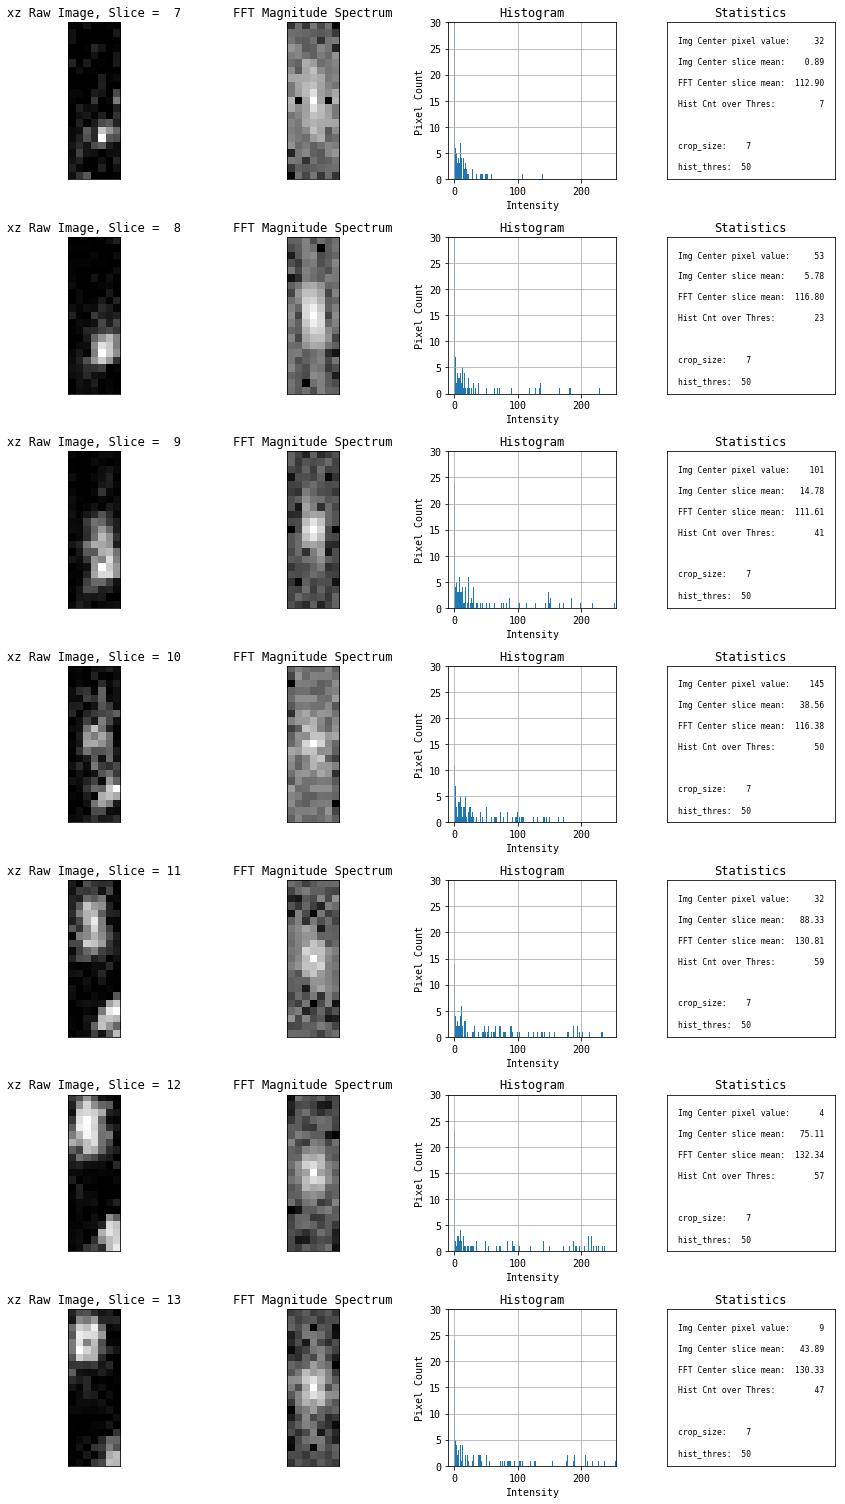

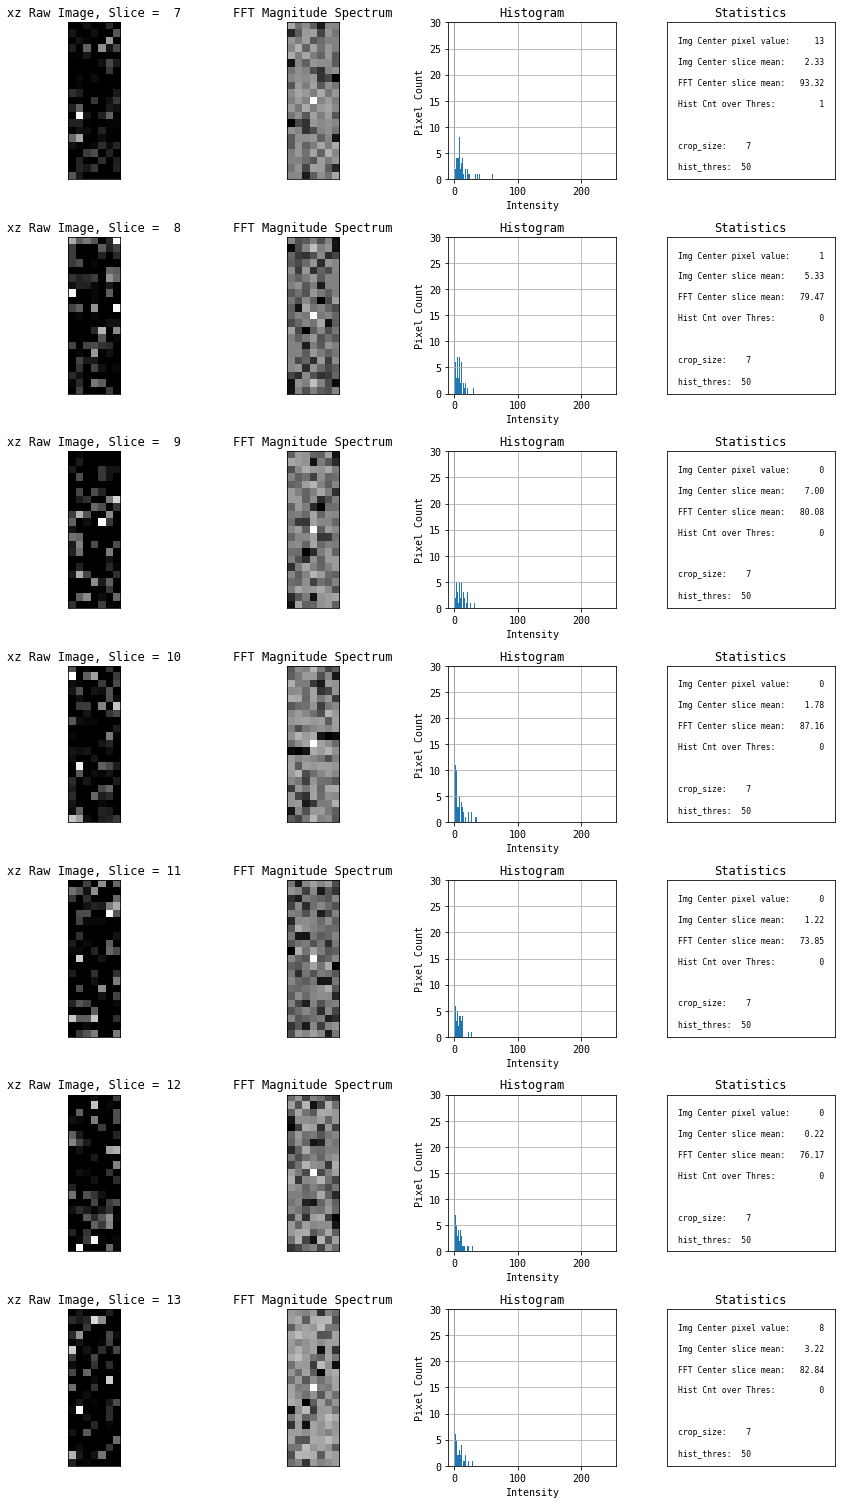

In [230]:
for img_index in [9,10]:

    img_label = input_labels[img_index]
    n_of_slices = 7
    first_slice = 10-n_of_slices//2
    last_slice = 10+n_of_slices//2+1
    y_range = np.arange(first_slice, last_slice)
    slice_plane='xz'
    fig_y_size=3*n_of_slices
    
    print()
    print("----------------------------------------------")
    print('Image number: %d\t ImageLabel: %d' % (img_index, img_label))
    fig, axes = plt.subplots(nrows=n_of_slices, ncols=4, figsize=(12,fig_y_size))
    for y_dim in y_range:

        # Raw image calc
        img = input_data[img_index][:,y_dim,:]
        
        # Histogram calc
        hist,bins = np.histogram(img.ravel(),256,[0,256])
        
        # FFT calculation
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        
        # Statistics calculation
        crop_size=7
        img_center_sclice_mean = np.mean(centerSlice(img,crop_size))
        img_center_pixel_value = img[10,3]
        fft_center_sclice_mean = np.mean(centerSlice(magnitude_spectrum,crop_size))
        
        hist_thres=50
        hist_count_over_thres = np.sum(hist[hist_thres:])
        
        # --------
        # Plots:

        # Image
        axes[y_dim-first_slice, 0].set_title('{} Raw Image, Slice = {:2d}'.format(slice_plane, y_dim))
        axes[y_dim-first_slice, 0].imshow(input_data[img_index][:,y_dim,:], cmap='gray', interpolation='nearest')
        axes[y_dim-first_slice, 0].axes.get_xaxis().set_ticks([])
        axes[y_dim-first_slice, 0].axes.get_yaxis().set_ticks([])

        # FFT
        axes[y_dim-first_slice, 1].set_title('FFT Magnitude Spectrum')
        axes[y_dim-first_slice, 1].imshow(magnitude_spectrum, cmap = 'gray')
        axes[y_dim-first_slice, 1].axes.get_xaxis().set_ticks([])
        axes[y_dim-first_slice, 1].axes.get_yaxis().set_ticks([])

        # Histogram
        axes[y_dim-first_slice, 2].set_title('Histogram')
        axes[y_dim-first_slice, 2].hist(img.ravel(),256,[0,256])
        axes[y_dim-first_slice, 2].axis([-10,255,0,30])
        axes[y_dim-first_slice, 2].set_xlabel('Intensity')
        axes[y_dim-first_slice, 2].set_ylabel('Pixel Count')
        axes[y_dim-first_slice, 2].grid()
        
        # Summary
        fontsize=8
        axes[y_dim-first_slice, 3].set_title('Statistics')
        axes[y_dim-first_slice, 3].axes.get_xaxis().set_ticks([])
        axes[y_dim-first_slice, 3].axes.get_yaxis().set_ticks([])
        axes[y_dim-first_slice, 3].text(1, 13, r'Img Center pixel value: {:6d}'.format(img_center_pixel_value), fontsize=fontsize)
        axes[y_dim-first_slice, 3].text(1, 11, r'Img Center slice mean:  {:6.2f}'.format(img_center_sclice_mean), fontsize=fontsize)
        axes[y_dim-first_slice, 3].text(1, 9,  r'FFT Center slice mean:  {:6.2f}'.format(fft_center_sclice_mean), fontsize=fontsize)
        axes[y_dim-first_slice, 3].text(1, 7 , r'Hist Cnt over Thres:    {:6d}'.format(hist_count_over_thres), fontsize=fontsize)
        axes[y_dim-first_slice, 3].text(1, 3 , r'crop_size:  {:3d}'.format(crop_size), fontsize=fontsize)
        axes[y_dim-first_slice, 3].text(1, 1 , r'hist_thres: {:3d}'.format(hist_thres), fontsize=fontsize)
        axes[y_dim-first_slice, 3].axis([0, 15, 0, 15])
        
        

    save_fig = True
    fig_format = 'png'
    fig_dpi =300
    
    fig.tight_layout()
    fig_name = 'img-output/sample-{:06d}-{}-{:d}.{}'.format(img_index,slice_plane,img_label,fig_format)
    print(fig_name)
    if(save_fig): fig.savefig(fig_name, bbox_inches='tight', format=fig_format, dpi=fig_dpi)

# Plotting YZ slice plane


----------------------------------------------
Image number: 9	 ImageLabel: 1
img-output/sample-000009-yz-1.png

----------------------------------------------
Image number: 10	 ImageLabel: 0
img-output/sample-000010-yz-0.png


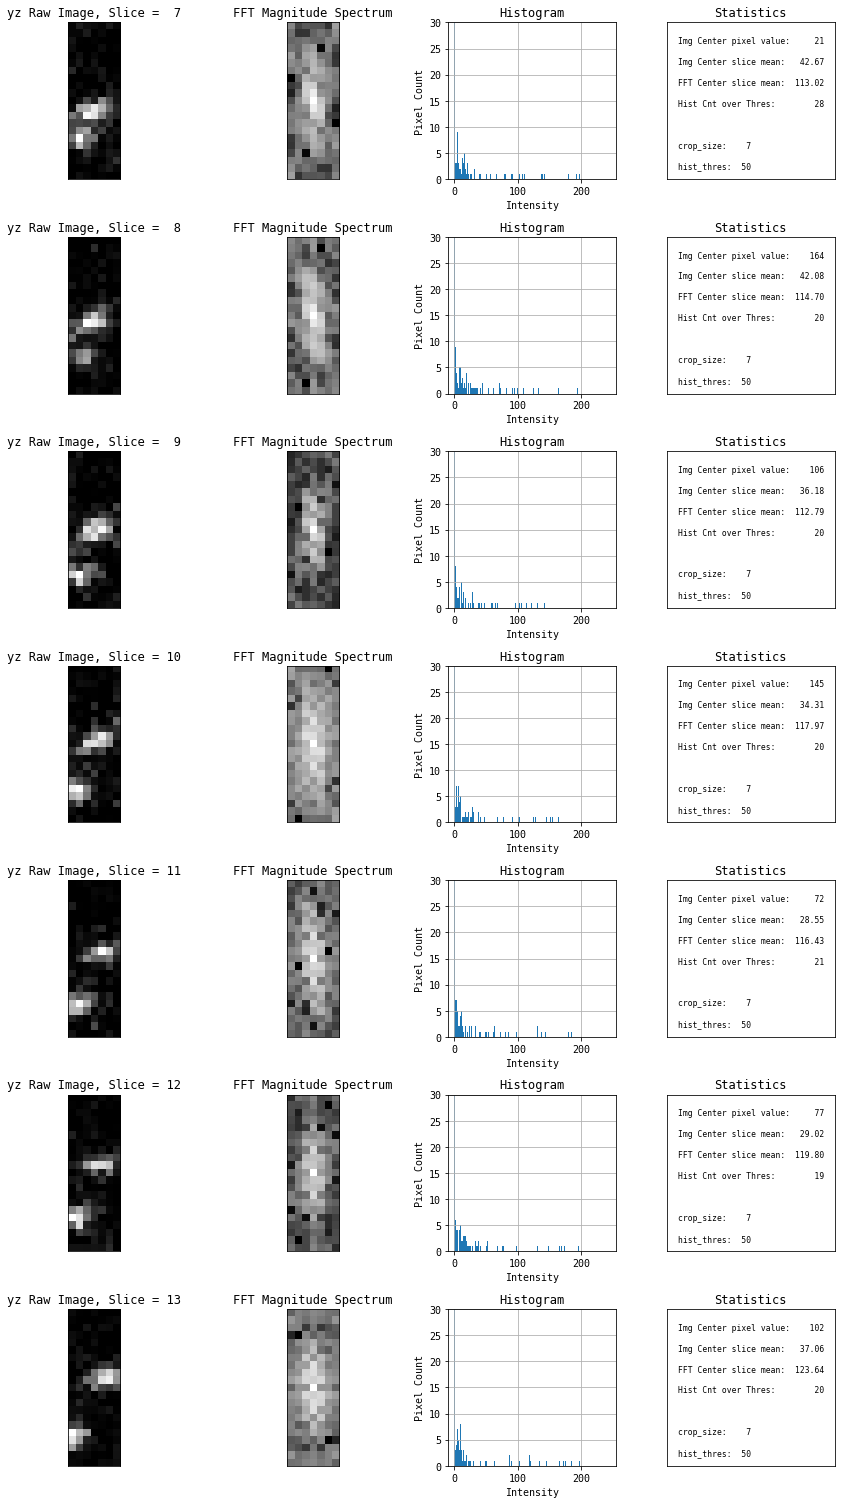

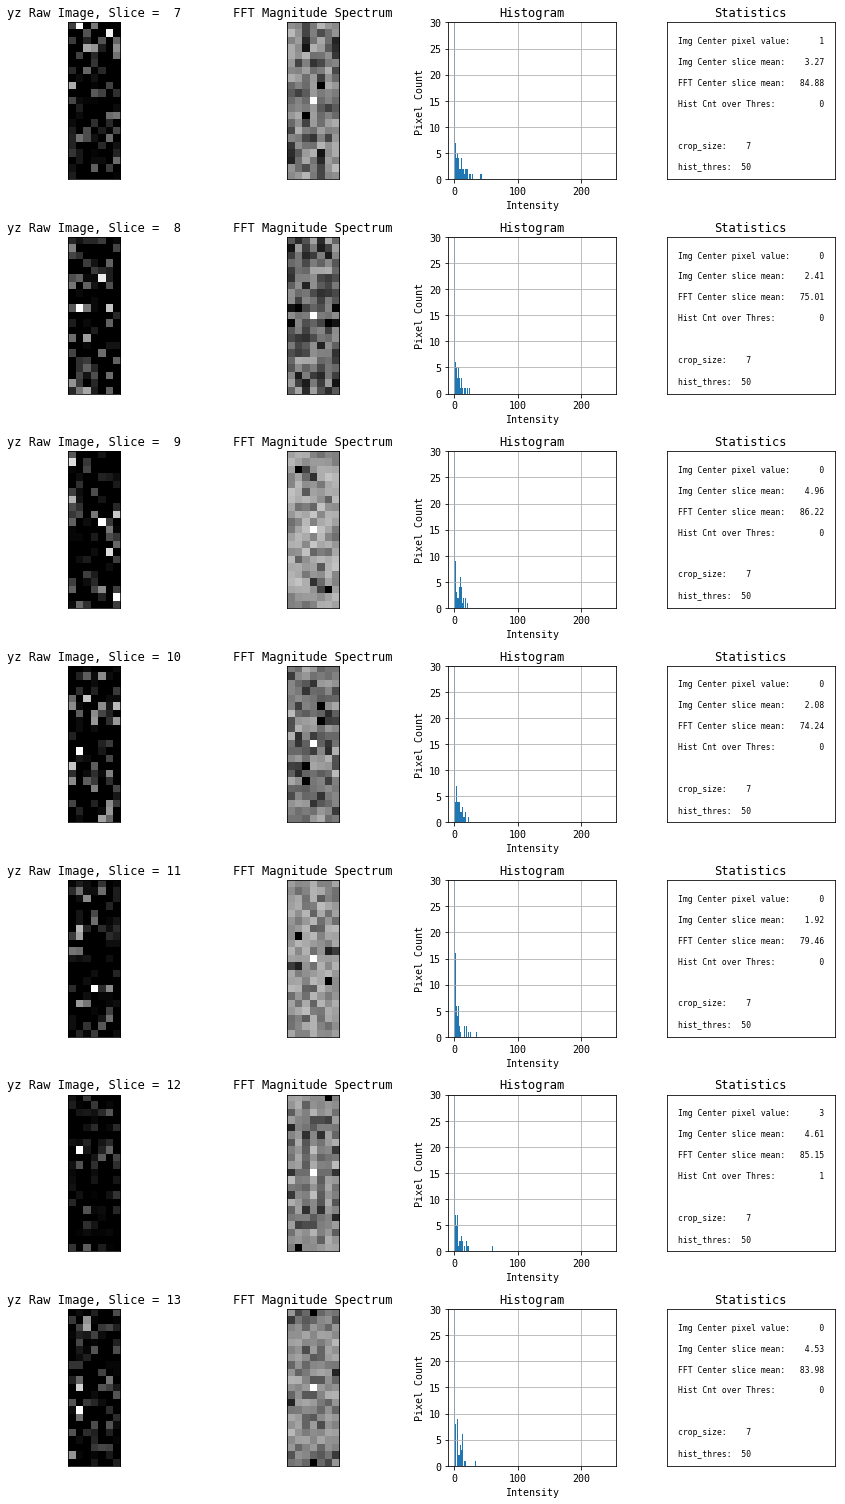

In [31]:
for img_index in [9,10]:

    img_label = input_labels[img_index]
    n_of_slices = 7
    first_slice = 10-n_of_slices//2
    last_slice = 10+n_of_slices//2+1
    x_range = np.arange(first_slice, last_slice)
    slice_plane='yz'
    fig_x_size=3*n_of_slices
    
    print()
    print("----------------------------------------------")
    print('Image number: %d\t ImageLabel: %d' % (img_index, img_label))
    fig, axes = plt.subplots(nrows=n_of_slices, ncols=4, figsize=(12,fig_x_size))
    for x_dim in x_range:

        # Raw image calc
        img = input_data[img_index][x_dim,:,:]
        
        # Histogram calc
        hist,bins = np.histogram(img.ravel(),256,[0,256])
        
        # FFT calculation
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        
        # Statistics calculation
        crop_size=7
        img_center_sclice_mean = np.mean(centerSlice(img,crop_size))
        img_center_pixel_value = img[10,3]
        fft_center_sclice_mean = np.mean(centerSlice(magnitude_spectrum,crop_size))
        
        hist_thres=50
        hist_count_over_thres = np.sum(hist[hist_thres:])
        
        # --------
        # Plots:

        # Image
        axes[x_dim-first_slice, 0].set_title('{} Raw Image, Slice = {:2d}'.format(slice_plane, x_dim))
        axes[x_dim-first_slice, 0].imshow(input_data[img_index][x_dim,:,:], cmap='gray', interpolation='nearest')
        axes[x_dim-first_slice, 0].axes.get_xaxis().set_ticks([])
        axes[x_dim-first_slice, 0].axes.get_yaxis().set_ticks([])

        # FFT
        axes[x_dim-first_slice, 1].set_title('FFT Magnitude Spectrum')
        axes[x_dim-first_slice, 1].imshow(magnitude_spectrum, cmap = 'gray')
        axes[x_dim-first_slice, 1].axes.get_xaxis().set_ticks([])
        axes[x_dim-first_slice, 1].axes.get_yaxis().set_ticks([])

        # Histogram
        axes[x_dim-first_slice, 2].set_title('Histogram')
        axes[x_dim-first_slice, 2].hist(img.ravel(),256,[0,256])
        axes[x_dim-first_slice, 2].axis([-10,255,0,30])
        axes[x_dim-first_slice, 2].set_xlabel('Intensity')
        axes[x_dim-first_slice, 2].set_ylabel('Pixel Count')
        axes[x_dim-first_slice, 2].grid()
        
        # Summary
        fontsize=8
        axes[x_dim-first_slice, 3].set_title('Statistics')
        axes[x_dim-first_slice, 3].axes.get_xaxis().set_ticks([])
        axes[x_dim-first_slice, 3].axes.get_yaxis().set_ticks([])
        axes[x_dim-first_slice, 3].text(1, 13, r'Img Center pixel value: {:6d}'.format(img_center_pixel_value), fontsize=fontsize)
        axes[x_dim-first_slice, 3].text(1, 11, r'Img Center slice mean:  {:6.2f}'.format(img_center_sclice_mean), fontsize=fontsize)
        axes[x_dim-first_slice, 3].text(1, 9,  r'FFT Center slice mean:  {:6.2f}'.format(fft_center_sclice_mean), fontsize=fontsize)
        axes[x_dim-first_slice, 3].text(1, 7 , r'Hist Cnt over Thres:    {:6d}'.format(hist_count_over_thres), fontsize=fontsize)
        axes[x_dim-first_slice, 3].text(1, 3 , r'crop_size:  {:3d}'.format(crop_size), fontsize=fontsize)
        axes[x_dim-first_slice, 3].text(1, 1 , r'hist_thres: {:3d}'.format(hist_thres), fontsize=fontsize)
        axes[x_dim-first_slice, 3].axis([0, 15, 0, 15])
        
        

    save_fig = True
    fig_format = 'png'
    fig_dpi =300
    
    fig.tight_layout()
    fig_name = 'img-output/sample-{:06d}-{}-{:d}.{}'.format(img_index,slice_plane,img_label,fig_format)
    print(fig_name)
    if(save_fig): fig.savefig(fig_name, bbox_inches='tight', format=fig_format, dpi=fig_dpi)

OBS: Cell images are being saved into "img-output" folder

# Volumetric Calculations

Center Pixel value: 145


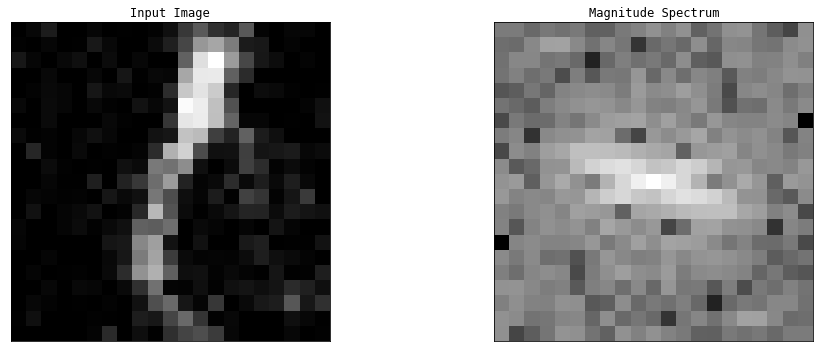

In [27]:
# Do a 2d one just for comparison
z_dim = 3
img_index = 9

img = input_data[img_index][:,:,z_dim]

print('Center Pixel value: %d' % input_data[img_index][10,10,z_dim])

hist,bins = np.histogram(img.ravel(),256,[0,256])
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))


plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

Center Pixel value: 145


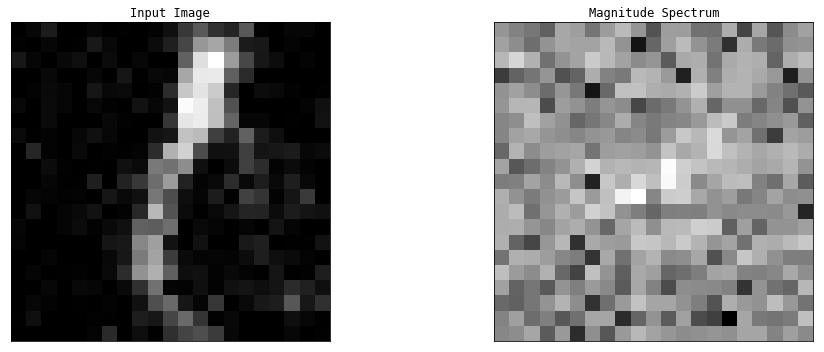

In [32]:
# FFT calculation
    
z_dim = 3
img_index = 9
img = input_data[img_index][:,:,:]

f = np.fft.fftn(img)
fshift = np.fft.fftshift(f[:,:,z_dim])
magnitude_spectrum = 20*np.log(np.abs(fshift))

print('Center Pixel value: %d' % input_data[img_index][10,10,z_dim])

plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img[:,:,z_dim], cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()
